In [1]:
# Cell 1: Imports and System Path Setup
# -------------------------------------
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Add the 'scripts' directory to the Python path
scripts_path = os.path.abspath(os.path.join('..', 'scripts'))
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

# Import our custom data processing functions
import validation_helpers as dp
print(f"Scripts path added: {scripts_path}")

Scripts path added: c:\dev\castilla_tourism_portfolio\scripts


In [2]:
# Cell 2: Configuration and Data Loading
# --------------------------------------
# Define CORRECTED relative paths and load all data
PATH_ANALYTICS = '../data/analytics/'
PATH_PUBLIC = '../data/raw/ine_data/'
PATH_CCAA_MOBILE = os.path.join(PATH_ANALYTICS, 'CCAA Castilla-La Mancha')

# Set plotting style and context
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")

# Load C-LM level data
nocturno_clm_df, noche_estancia_clm_df = dp.load_and_clean_mobile_data(PATH_CCAA_MOBILE)
public_data = dp.load_and_clean_public_data(PATH_PUBLIC)
print("Castilla-La Mancha data loaded successfully.")

Castilla-La Mancha data loaded successfully.


KeyError: 'EOH_Domestic'

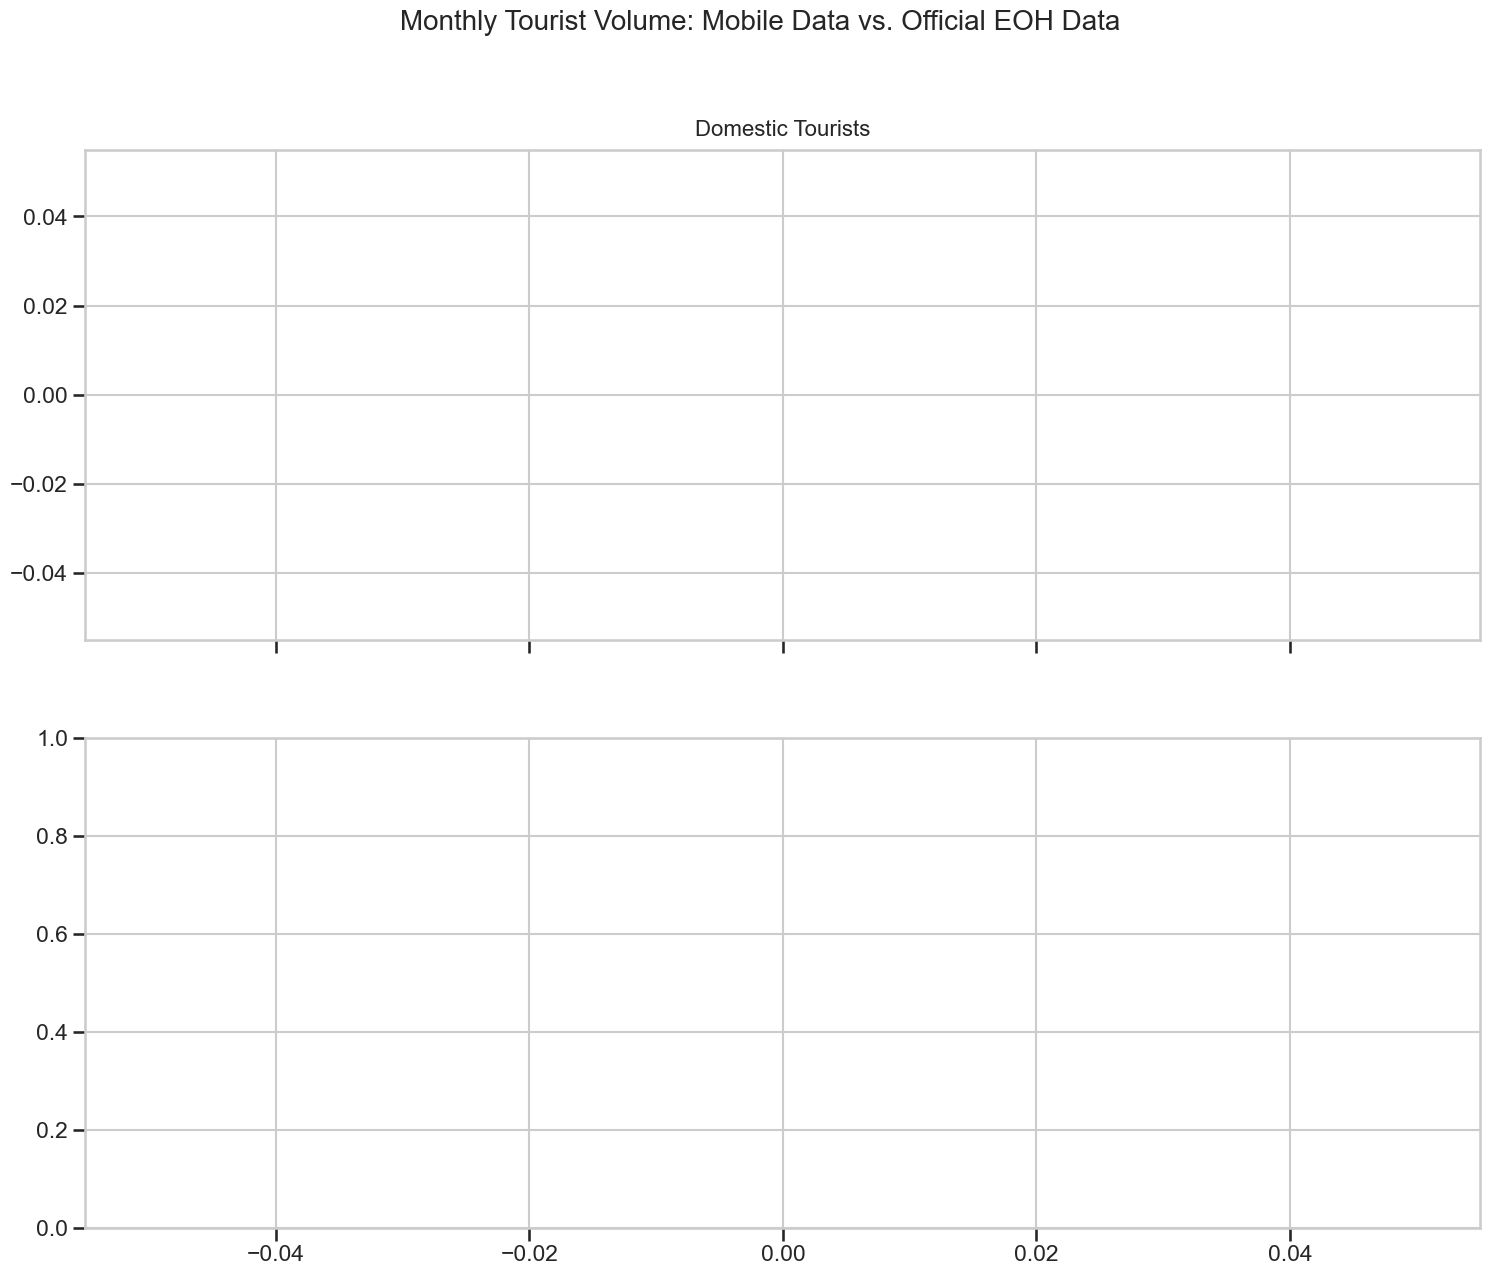

In [3]:
# Cell 3: Analysis 1 - Monthly Tourist Volume Comparison (Modified for Bar Charts)
# ---------------------------------------------------------------------------------
import numpy as np

# This function call now uses the new logic from the modified helper
tourist_comparison_df = dp.prepare_monthly_tourist_comparison(nocturno_clm_df, public_data['eoh'])

# --- Plotting Code (Modified for Grouped & Stacked Bar Charts) ---

# Plot settings
dates = tourist_comparison_df['date']
x = np.arange(len(dates))  # the label locations
width = 0.35  # the width of the bars

# Create a figure with two subplots stacked vertically
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 14), sharex=True)
fig.suptitle('Monthly Tourist Volume: Mobile Data vs. Official EOH Data', fontsize=20, y=0.98)

# --- Plot 1: Domestic Tourists ---
ax1.set_title('Domestic Tourists', fontsize=16, pad=10)

# Bar 1: Stacked Mobile Data (Turista + Habitual)
ax1.bar(x - width/2, tourist_comparison_df['Mobile_Domestic_Turista'], width,
        label='Mobile (Turista)', color='darkblue')
ax1.bar(x - width/2, tourist_comparison_df['Mobile_Domestic_Habitual'], width,
        bottom=tourist_comparison_df['Mobile_Domestic_Turista'],
        label='Mobile (Habitualmente Presente)', color='cornflowerblue')

# Bar 2: EOH Data
ax1.bar(x + width/2, tourist_comparison_df['EOH_Domestic'], width,
        label='EOH (Official)', color='orange')

ax1.set_ylabel('Number of Tourists', fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(True, axis='y', linestyle='--', linewidth=0.5)


# --- Plot 2: Foreign Tourists ---
ax2.set_title('Foreign Tourists', fontsize=16, pad=10)

# Bar 1: Stacked Mobile Data (Turista + Habitual)
ax2.bar(x - width/2, tourist_comparison_df['Mobile_Foreign_Turista'], width,
        label='Mobile (Turista)', color='darkgreen')
ax2.bar(x - width/2, tourist_comparison_df['Mobile_Foreign_Habitual'], width,
        bottom=tourist_comparison_df['Mobile_Foreign_Turista'],
        label='Mobile (Habitualmente Presente)', color='mediumseagreen')

# Bar 2: EOH Data
ax2.bar(x + width/2, tourist_comparison_df['EOH_Foreign'], width,
        label='EOH (Official)', color='gold')

ax2.set_ylabel('Number of Tourists', fontsize=12)
ax2.legend(fontsize=12)
ax2.grid(True, axis='y', linestyle='--', linewidth=0.5)

# Set common X-axis labels and formatting
ax2.set_xlabel('Date', fontsize=14)
plt.xticks(x, dates.strftime('%Y-%m'), rotation=70) # Format dates on x-axis

# --- Final Layout Adjustments ---
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display the head of the newly structured dataframe
display(tourist_comparison_df.head())

In [ ]:
# Cell 4: Analysis 2 - Average Length of Stay Comparison (Using Corrected Function)
# ---------------------------------------------------------------------------------
# This now uses the refined function that filters for tourist categories.
stay_comparison_df = dp.prepare_average_stay_comparison(noche_estancia_clm_df, public_data['eoh'])
# ... (plotting code) ...
fig, ax = plt.subplots(figsize=(15, 8))
stay_comparison_df.plot(x='date', y=['Mobile_Avg_Stay', 'EOH_Avg_Stay'], ax=ax, style=['-o', '--s'], lw=2.5, ms=8)
ax.set_title('Average Length of Stay (Tourists Only): Mobile Data vs. EOH', fontsize=20, pad=20)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Average Nights per Visitor', fontsize=14)
ax.legend(['Mobile Data Avg. Stay', 'EOH Avg. Stay'], fontsize=12)
plt.tight_layout()
plt.show()
display(stay_comparison_df.head())

In [ ]:



# Cell 5: Analysis 3 - City-Level Resident Population Comparison (NEW)
# --------------------------------------------------------------------
# This new analysis compares resident population at the city level
# between mobile data and the official Padrón municipal.

# 1. Prepare data using our new helper function
city_pop_comparison_df = dp.prepare_city_population_comparison(PATH_ANALYTICS, PATH_PUBLIC)

# 2. Reshape data for plotting
city_pop_melted = city_pop_comparison_df.melt(
    id_vars=['year', 'City'], 
    value_vars=['Mobile_Population', 'Padron_Population'],
    var_name='Source', 
    value_name='Population'
)

# 3. Generate visualization
g = sns.catplot(
    data=city_pop_melted,
    x='City',
    y='Population',
    hue='Source',
    col='year',
    kind='bar',
    height=6,
    aspect=1.2
)
g.fig.suptitle('Annual Resident Population: Mobile Data vs. Padrón', y=1.03, fontsize=20)
g.set_axis_labels("City", "Average / Total Population")
g.set_titles("Year {col_name}")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# 4. Display data
print("City-Level Population Comparison Data:")
display(city_pop_comparison_df)